In [1]:
#memory that we can use
!free -h --si | awk  '/Mem:/{print $2}'
#GPU count and name
!nvidia-smi

13G
Thu Oct 27 02:54:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+---

In [2]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [3]:
import torch
from datetime import date, datetime
from modules import Reconstruction, Visualization, Utils, Network

In [4]:
# GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# Define data set name and constraint type
dataset_name = 'stanford-bunny'
current_date = date.today().strftime("%Y%m%d")
# current_date = '20210726'
attempt = '0'
epoch = 3000

batch_size = 8192

print(datetime.now())

2022-10-27 02:54:54.719023


In [6]:
# Load points from file
filename = mp + '/dataset/3d/' + dataset_name + '.xyz'
data = Utils.read_txt3(filename, k_distance=50, rescale=1.5, device=device)

In [7]:
traineddata_path = mp + '/models/' + current_date + '_' + attempt + '.traineddata'
model, optimizer, scheduler = Network.load_model(traineddata_path, dimension=3, device=device)

No model found. New model created

[Errno 2] No such file or directory: '/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/models/20221027_0.traineddata'


Setting up
No previous loss value found.

Training
Epoch: 10   Loss: 0.5831826329231262   Learning rate: 0.0001
Surface loss: 0.03972852602601051   Normal loss: 0   Constraint: 0.1810765117406845
Off-surface constraint:  0.009641742333769798

Epoch: 20   Loss: 0.3709680736064911   Learning rate: 0.0001
Surface loss: 0.022124260663986206   Normal loss: 0   Constraint: 0.14272162318229675
Off-surface constraint:  0.01400768756866455

Epoch: 30   Loss: 0.30065682530403137   Learning rate: 0.0001
Surface loss: 0.015867117792367935   Normal loss: 0   Constraint: 0.13318538665771484
Off-surface constraint:  0.017600538209080696

Epoch: 40   Loss: 0.2559144198894501   Learning rate: 0.0001
Surface loss: 0.012608971446752548   Normal loss: 0   Constraint: 0.120040163397789
Off-surface constraint:  0.019569095224142075

Epoch: 50   Loss: 0.24877837300300598   Learning rate: 0.0001
Surface loss: 0.0114867789670825   Normal loss: 0   Constraint: 0.12371359765529633
Off-surface constraint:  0.0203

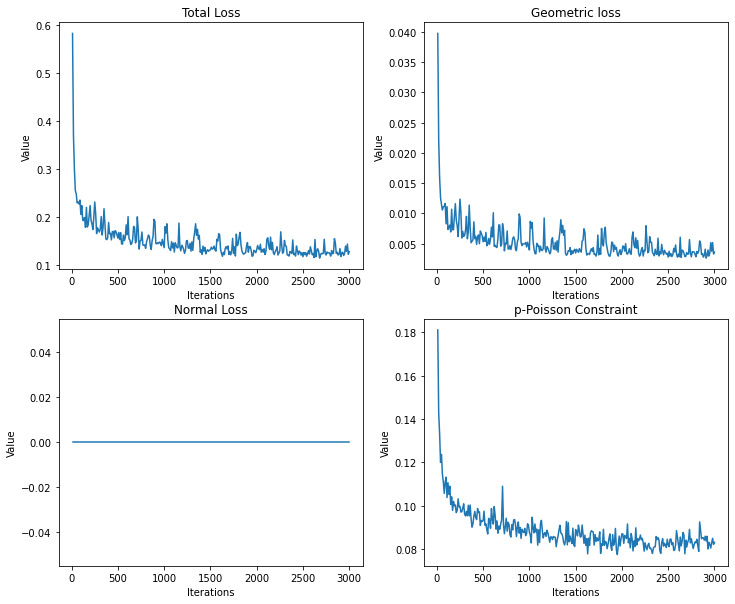

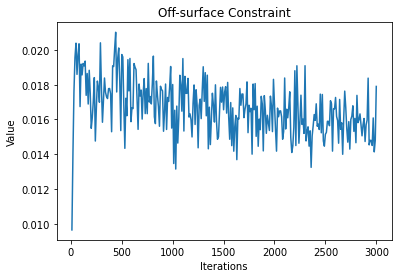

In [8]:
outfile = mp + '/figures/loss_value/' + current_date + '_' + attempt + '.npy'
model, optimizer, scheduler = Reconstruction.train(epoch,
                             model,
                             optimizer,
                             scheduler,
                             batch_size=batch_size,
                             data=data,
                             dim=3,
                             is_normal=False,
                             loss_output_path=outfile,
                             device=device)

In [9]:
save_path = mp + '/models/' + current_date + '_' + attempt + '.traineddata'
Network.save_model(save_path, model, optimizer, scheduler)

In [10]:
# xx, yy, zz = Visualization.grid_from_torch(data[:,0:3], resx=32, resy=32, resz=32, device=device)

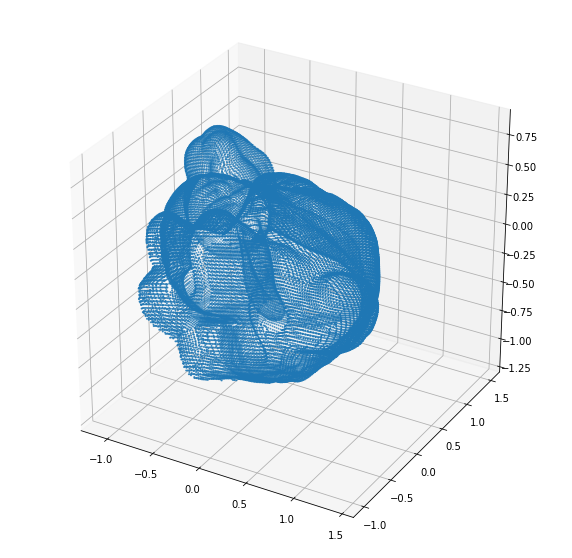

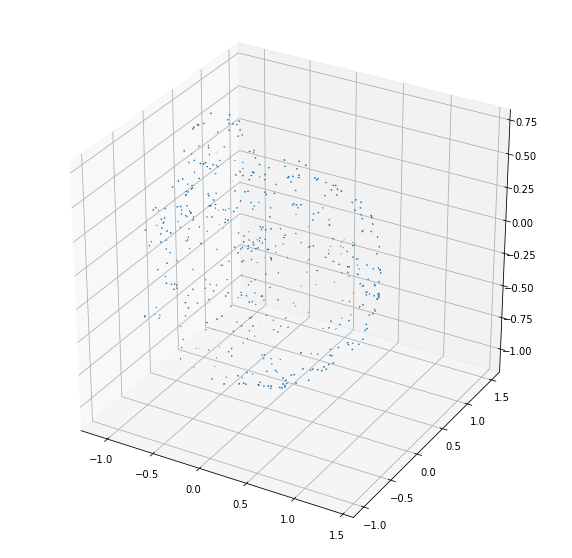

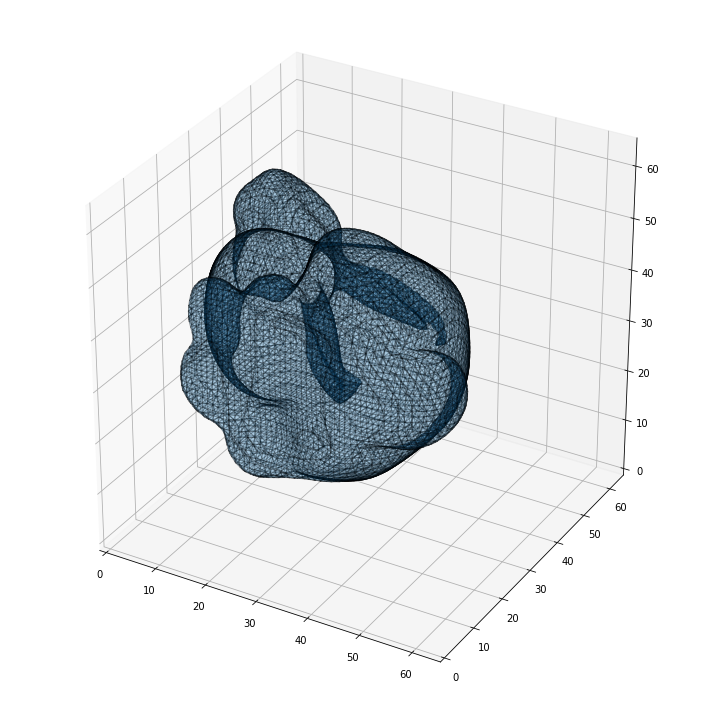

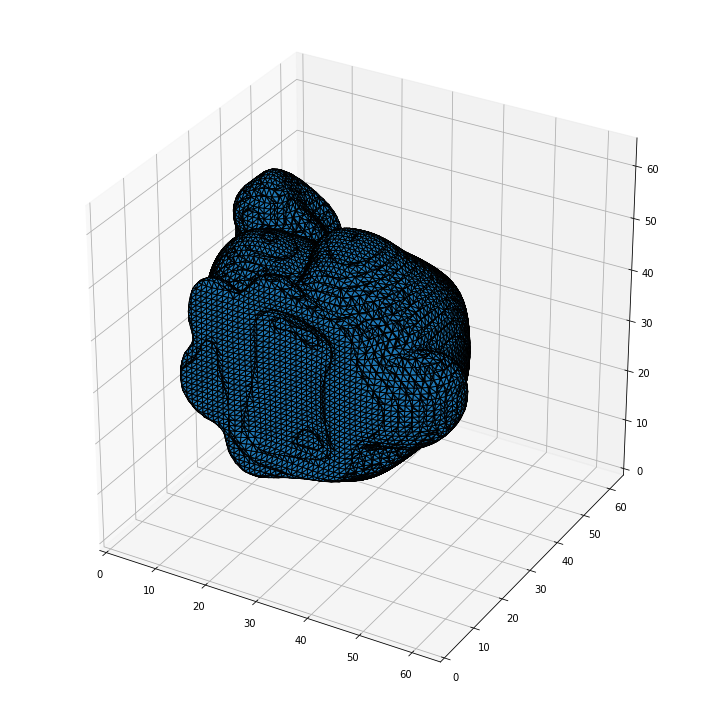

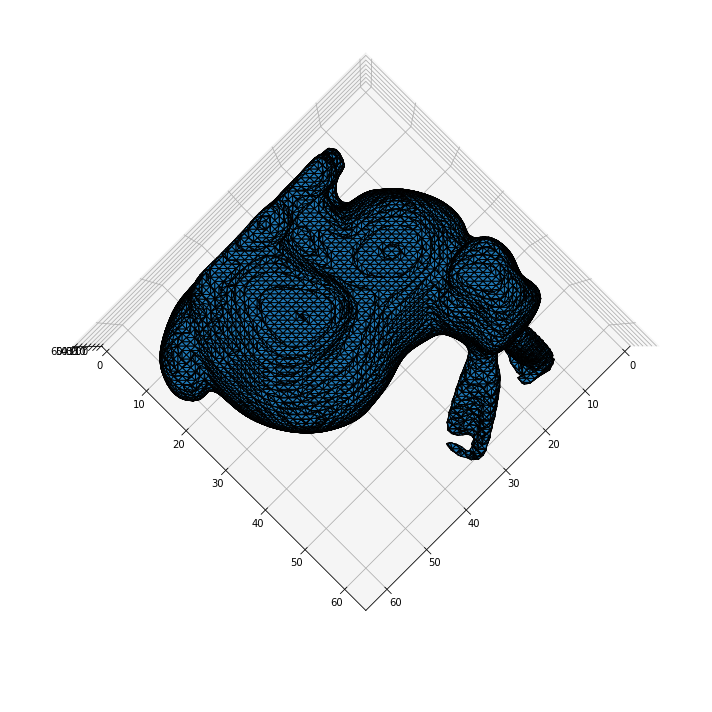

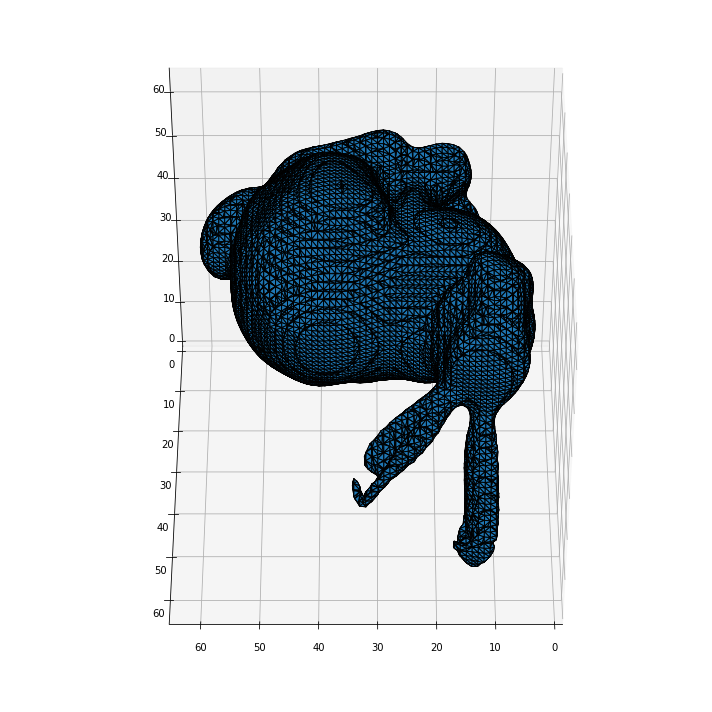

In [12]:
constraint_output_path = None
vtk_output_path = None
Visualization.visualize3(model, data, resx=64, resy=64, resz=64,
                         constraint_output_path=constraint_output_path, 
                         vtk_output_path=vtk_output_path,
                         scatter=True, vecfield=True, surface=True,
                         device=device)